# Introduction to Linear Regression


**OBJECTIVES**

- Implement Linear Regression with scikitlearn
- Interpret results of Linear Regression model
- Implement pipeline to add polynomial features to model
- Implement train/test split to develop model
- Use cross-validation to improve predictive ability of model


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
df = pd.read_csv('data/ads.csv', index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


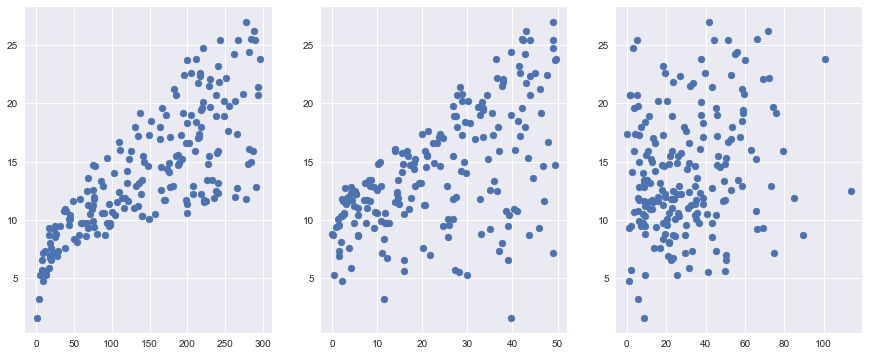

In [6]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 3, 1)
plt.scatter(df.TV, df.sales)

plt.subplot(1, 3, 2)
plt.scatter(df.radio, df.sales)

plt.subplot(1, 3, 3)
plt.scatter(df.newspaper, df.sales)

In [7]:
from pandas.plotting import scatter_matrix

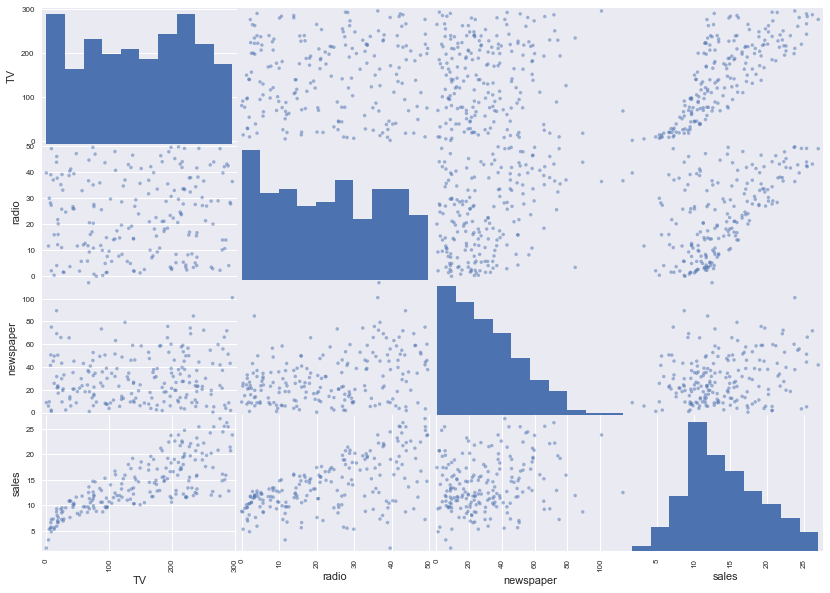

In [8]:
scatter_matrix(df, figsize = (14, 10));

In [9]:
lr = LinearRegression()

In [10]:
X = df.TV.values.reshape(-1,1)

In [11]:
lr.fit(X, df.sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
lr.coef_

array([ 0.04753664])

In [13]:
lr.intercept_

7.032593549127693

In [14]:
predictions = lr.predict(X)

In [15]:
residuals = df.sales - predictions

In [16]:
residuals.describe()

count    2.000000e+02
mean    -1.638689e-15
std      3.250458e+00
min     -8.385982e+00
25%     -1.954522e+00
50%     -1.912655e-01
75%      2.067109e+00
max      7.212369e+00
Name: sales, dtype: float64

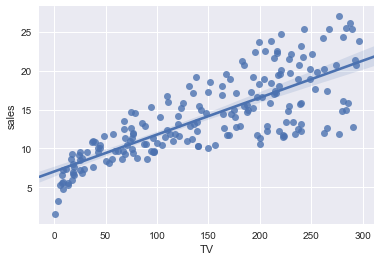

In [17]:
sns.regplot('TV', 'sales', data=df)

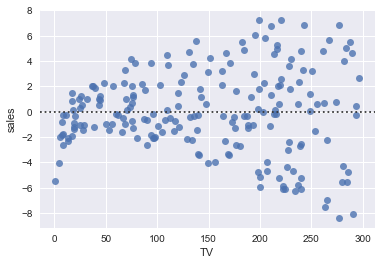

In [18]:
sns.residplot('TV', 'sales', data = df)
#The below plot shows that the model performs better at lower values.  At higher values the residuals are higher

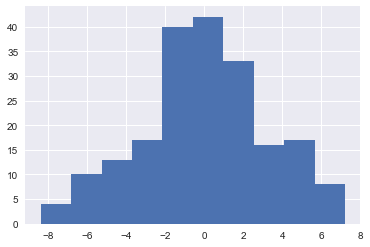

In [19]:
plt.hist(residuals);

### Problem

Examine the other two advertising media and their relationships to the `sales` variable. Examine the **RMSE** or root mean square error in the models predictions for each.  Which is the lowest, and what do you think this means?

*HINT*:(**The RMSE is the square root of the sum of the difference between the predicted value and the actual value squared**)

i.e. $rmse = \sqrt(\sum (y_i - (mx_i + b))^2)$

We can use the built in `mean_squared_error` functiong from sklearn, and take the square root.

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
np.sqrt(mean_squared_error(predictions, df.sales))

3.2423221486546887

In [22]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [23]:
for col in ['radio', 'TV', 'newspaper']:
    lr.fit(df[col].values.reshape(-1,1), df.sales)
    pred = lr.predict(df[col].values.reshape(-1,1))
    rmse = np.sqrt(mean_squared_error(pred, df.sales))
    print("The coefficient for", col, "is", lr.coef_, "\nThe intercept is", lr.intercept_, "\nand the RMSE is {:.3f}".format(rmse), "\n==========")

The coefficient for radio is [ 0.20249578] 
The intercept is 9.31163809516 
and the RMSE is 4.254 
The coefficient for TV is [ 0.04753664] 
The intercept is 7.03259354913 
and the RMSE is 3.242 
The coefficient for newspaper is [ 0.0546931] 
The intercept is 12.3514070693 
and the RMSE is 5.067 


### Adding Features

Suppose we wanted to develop a model that had both TV and radio as a part of it.  We could do this by simply inputting multiple values for our `X` variable.  The result of the fit is a linear function in three variables:

$$z = ax + by + c$$



In [24]:
#Manually splitting apart the dataframe so that the first 180 rows are the training split and the rows after 180 are the test.
X_Train = df['TV'][:180]
X_Test = df['TV'][180:]
y_Train = df['sales'][:180]
y_Test = df['sales'][180:]

In [25]:
from sklearn.metrics import mean_squared_error
def two_var(df):
    X = df[['TV', 'radio']]
    y = df.sales
    lr.fit(X, y)
    predictions = lr.predict(X)
    print('The root mean squared error is {:.2f}'.format(np.sqrt(mean_squared_error(y, predictions))))

In [26]:
lr.coef_

array([ 0.0546931])

In [27]:
predictions = lr.predict(X)

In [28]:
lr.fit(X_Train.values.reshape(-1,1), y_Train)
pred = lr.predict(X_Test.values.reshape(-1,1))

In [29]:
np.sqrt(mean_squared_error(pred, y_Test))

3.5105656447144393

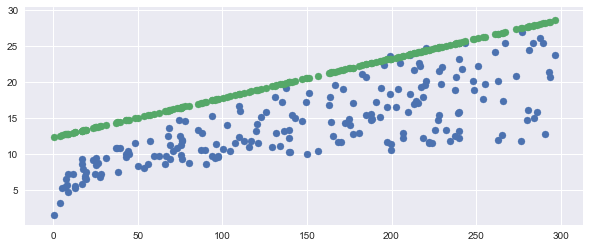

In [30]:
plt.figure(figsize = (10, 4))
plt.scatter(df.TV, df.sales)
plt.scatter(df.TV, predictions)

### Problem

Investigate other pairings of variables and develop a linear regression model for each.  Which is the strongest model and why?

### Adding Complexity

| First Degree    | With Quadratic Features |
| -----   | ----- |
|$$ z = ax + by $$ | $$z = ax + bx^2 + cxy + dy^2 + ey$$|

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
from sklearn.pipeline import make_pipeline

In [33]:
pipe = make_pipeline(PolynomialFeatures(2),
                     LinearRegression())

In [34]:
pipe.fit(X, y)

NameError: name 'y' is not defined

In [ ]:
predictions = pipe.predict(X)

In [ ]:
np.sqrt(mean_squared_error(predictions, y))

### Problem

Compare the outcome of adding 3, 5, and 10 polynomial features.  How do these models compete with one another?  

To compare the predictive validity of the model, split your data into a **train** and a **test** set. The **train** set should contain 80% of the original data, and you will build your model on this.  The **test** set will assess the validity of the models.

In [ ]:
df.shape

In [ ]:
train = df[:160]
test = df[160:]

In [ ]:
train.head()

In [ ]:
pipe = make_pipeline(PolynomialFeatures(3), 
                    LinearRegression())

In [ ]:
X_train = train[['TV', 'radio']]
y_train = train['sales']

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
X_test = test[['TV', 'radio']]
y_test = test['sales']

In [ ]:
pred = pipe.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

In [ ]:
pipe = make_pipeline(PolynomialFeatures(5), 
                    LinearRegression())
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

In [ ]:
pipe = make_pipeline(PolynomialFeatures(10), 
                    LinearRegression())
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(lr.predict(X_train), y_train))

### Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(lr, X_train, y_train, cv = 5)

NameError: name 'X_train' is not defined

In [37]:
from sklearn.cross_validation import cross_val_predict

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
cross_val_predict(lr, X_train, y_train, cv = 5)[:10]

NameError: name 'X_train' is not defined

### Problem

A classic example of a regression example is the Boston housing dataset.  Here, we use the built-in housing dataset to make predictions about the housing value.  You should try to do the following:

1. Create a DataFrame that contains both the data and target variables as well as the appropriate feature names.
2. Explore the distribution of variables, comment on necessary transformations.
3. Explore a heatmap of the correlation matrix.  What variables seem highly correlated with the Price of the houses?
4. Develop a LinearRegression model using a single variable as a predictor.  Determine the RMSE of your model.
5. Develop a LinearRegression model using multiple input variables as predictors.  Does this model perform better than the earlier model?  How do you know.
6. Split your input data into a train/test sets.  Use your training data to develop a multiple regression model and evaluate its RMSE.
7. Use your train test split to run a cross-validation to make predictions.  Investigate the RMSE and describe the outcome of your model.
8. Across all your models, which performed the best?  How do you know, and what does this mean for each individual variable.

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
boston.keys()

In [ ]:
print(boston.DESCR)

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
df.head()

In [ ]:
df['price'] = boston.target

In [ ]:
df.info()

In [ ]:
df.hist(figsize = (15, 11));